<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:دانیال راستی

**Student ID**:99101581





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3)
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [2]:
X, Y = None, None

### START CODE HERE ###
# Read the data from the CSV file
data = pd.read_csv("Q3/data2_logistic.csv")

# Separate features (X) and target (Y)
X = data.iloc[:, :-1]  # Extract all columns except the last one
Y = data.iloc[:, -1]   # Extract the last column

# Display the shape of X and Y to verify

### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: without normalizing, data scales are different and whit can cause problems. and also, normalizations helps with convergence speed in gradient decent.

In [3]:
### START CODE HERE ###
# Calculate mean and standard deviation of each feature
mean = X.mean()
std_dev = X.std()

# Subtract mean from each feature
X_normalized = X - mean

# Divide each feature by its standard deviation
X_normalized = X_normalized / std_dev

# Display the normalized feature matrix
print("Normalized X matrix:")
print(X_normalized.head())
### END CODE HERE ###

Normalized X matrix:
         X1        X2        X3
0 -0.397126 -0.186205  1.399585
1 -1.386763  1.674819  0.078818
2 -1.585935  0.017018  1.684129
3 -0.289065 -0.434201  0.887399
4  0.454547 -1.248803  0.707707


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [4]:
### START CODE HERE ###

# Add a column of 1s to represent the bias term
X = np.column_stack((np.ones(len(X_normalized)), X_normalized))

### END CODE HERE ###

print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [5]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    result = 1 / (1 + np.exp(-Z))
    return result

    ### END CODE HERE ###

In [6]:
# testing sigmoind function 
np.set_printoptions(precision=3)
test_matrix = np.array([[1,5,0,2.4],[-6,-7,7,112]])
test_matrix_result =  sigmoid(test_matrix)
print(test_matrix_result)


[[7.311e-01 9.933e-01 5.000e-01 9.168e-01]
 [2.473e-03 9.111e-04 9.991e-01 1.000e+00]]


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [7]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    h = sigmoid(np.dot(X, theta))
    term1 = np.dot(-y, np.log(h))
    term2 = np.dot((1 - y), np.log(1 - h))
    regularization_term = (regLambda / (2)) * np.sum(np.square(theta[1:]))  # Excluding theta[0] for regularization
    loss = (1 / m) * (np.sum(term1 - term2) + regularization_term)
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:the value that makes The gradient of the cost function with respect to the $j^{th) , zero  

In [8]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    h = sigmoid(np.dot(X, theta))

    # if (len(h)!=len(y)) or 

    grad = (1 / m) * np.dot(X.T, (h - y))
    regularization_term = (2*regLambda) * theta
    regularization_term[0] = 0  # Don't regularize bias term
    grad += regularization_term
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [9]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 2e-4, maxNumIters = 1000):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta = np.zeros(4)
    loss_history = []
    ### START CODE HERE ###
    for i in range(maxNumIters):
        old_theta = theta.copy()
        grad = computeGradient(theta, X, y, regLambda)
        theta -= alpha * grad
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)
        if hasConverged(old_theta, theta, epsilon):
            break
    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    return np.linalg.norm(theta_new - theta_old) <= epsilon
    ### END CODE HERE ###
    return False

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

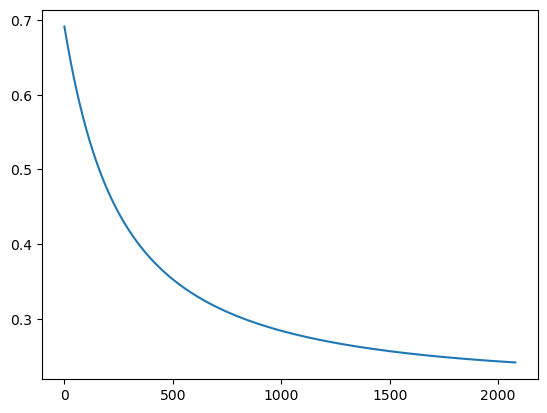

predicted theta : [-0.569 -0.741  1.816  0.043]
MSE is : 0.06059406757738022
final loss is : 0.24175994375406673
R squared : 0.7496561460005663
Accuracy:  0.98


In [21]:

theta, loss_history = fit(X, Y, regLambda = 0.02, alpha = 0.01, epsilon = 2e-4, maxNumIters = 10000) # calculating theta and loss of each iteration

### START CODE HERE ###
plt.plot(loss_history)
plt.show()
print ("predicted theta :" , theta)
### END CODE HERE ###

m,n = X.shape

# evaluating goodness of model
y_pred = sigmoid(np.dot(X, theta))
print ("MSE is :" ,sum((y_pred - Y)**2)/m)
final_loss = computeCost(theta, X, Y, 0.01)
print ("final loss is :" , final_loss)
R_squared = 1 - (sum((y_pred - Y)**2)/sum((Y - np.mean(Y))**2))
print ("R squared :" , R_squared)


binary_prediction = np.round(y_pred)
correct_prediction = np.sum(binary_prediction == Y)
print("Accuracy: ", correct_prediction/m)




### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [11]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###

# Split the dataset into training (70%), validation (20%), and test (10%) sets
X_train_temp, X_test, Y_train_temp, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_temp, Y_train_temp, test_size=2/9, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
### END CODE HERE ###

Training set shape: (7000, 4)
Validation set shape: (2000, 4)
Test set shape: (1000, 4)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [12]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    h = sigmoid(np.dot(X, theta))
    Y = h>0.5
    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**: laege amoung of regularization constant will rezult in underfittig, becuse large size of dataset, there is not much overfitting risk even with very small amount of regularization constant. to some extent, increasing learning rate will result in faster convergece, excessive amounts of learning rate will cause model to diverge.


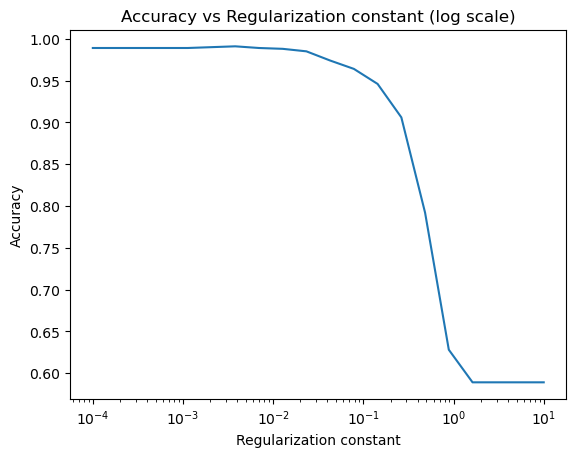

The optimal regularization constant is: 0.00379269019073225
maximum accuracy is: 0.991


In [23]:
### START CODE HERE ###
Max_itration = 2000
# *******************part 1 : finding optimal values of regularization constant *********************
regularization_constants = np.logspace(-4,1,20)
accuracy = np.zeros_like(regularization_constants)
cnt = 0
for RC in regularization_constants :
    theta, loss_history = fit(X_train, Y_train, regLambda = RC, alpha = 0.02, epsilon = 2e-4, maxNumIters = Max_itration) # calculating theta and loss of each iteration
    test_prediction = predict(X_test,theta) # predicting on test set
    # measuring accuracy on test set for different values of regularization constant
    binary_prediction = np.round(test_prediction)
    correct_prediction = np.sum(binary_prediction == Y_test)
    accuracy[cnt]=(correct_prediction/len(Y_test))
    cnt +=1

plt.semilogx(regularization_constants,accuracy)
plt.xlabel('Regularization constant')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization constant (log scale)')
plt.show()
#finding optimal regularization constant
optimal_RC = regularization_constants[np.argmax(accuracy)]
print("The optimal regularization constant is:", optimal_RC)
print("maximum accuracy is:", np.max(accuracy))



### END CODE HERE ###

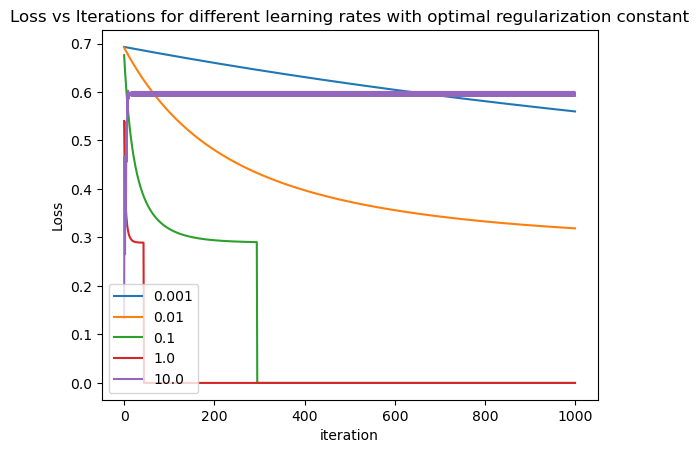

In [14]:
# ****************** part 2 : changing value of learning rate *********************
Max_itration = 1000

optimal_RC = regularization_constants[np.argmax(accuracy)]

learning_rates = np.logspace(-3,1,5)
loss_histories = np.zeros((len(learning_rates),Max_itration))
cnt = 0



for LR in learning_rates :
    theta, loss_history = fit(X_train, Y_train, regLambda = optimal_RC, alpha = LR, epsilon = 2e-4, maxNumIters = Max_itration) # calculating theta and loss of each iteration
    loss_history = np.pad(loss_history, (0,Max_itration-len(loss_history)), 'constant')
    loss_histories[cnt,:] = loss_history
    plt.plot(loss_history, label=LR)
    cnt +=1
plt.legend()
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iterations for different learning rates with optimal regularization constant')
plt.show()

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.921 precent

In [15]:
### START CODE HERE ###

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training set
gnb.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = gnb.predict(X_test)


# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of Gaussian Naive Bayes classifier:", accuracy)
### END CODE HERE ###

Accuracy of Gaussian Naive Bayes classifier: 0.921


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.97 percent

In [16]:
### START CODE HERE ###

# Initialize the Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = lda.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of Linear Discriminant Analysis classifier:", accuracy)

### END CODE HERE ###

Accuracy of Linear Discriminant Analysis classifier: 0.97


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: regularized logistic regression with optimal regularization constant was able to perform at 0.991 accuracy, which is higher than both naive base and LDA, and as it is expected, LDA performs better than Naive (0.97 vs 0.92)